# Posterior surface plots in 3D

In [1]:
import numpy as np

from scipy.stats import norm
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D  

# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random

%matplotlib inline

## Test

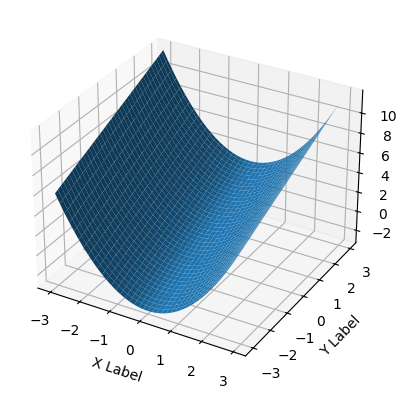

In [6]:

def fun(x, y):
    return x**2 + y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [13]:
X

array([[-3.  , -2.95, -2.9 , ...,  2.85,  2.9 ,  2.95],
       [-3.  , -2.95, -2.9 , ...,  2.85,  2.9 ,  2.95],
       [-3.  , -2.95, -2.9 , ...,  2.85,  2.9 ,  2.95],
       ...,
       [-3.  , -2.95, -2.9 , ...,  2.85,  2.9 ,  2.95],
       [-3.  , -2.95, -2.9 , ...,  2.85,  2.9 ,  2.95],
       [-3.  , -2.95, -2.9 , ...,  2.85,  2.9 ,  2.95]])

# Unimodal

In [2]:
x = np.arange(-6.0, 6.0, 0.05)
y = np.arange(-6.0, 6.0, 0.05)

rv = multivariate_normal(mean=[0, 0], cov=[[2, 0], [0, 2]])

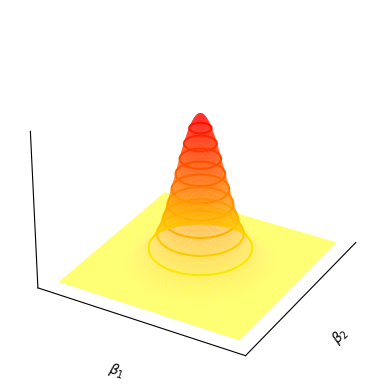

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Hide grid lines
ax.grid(False)

ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# ax.spines[['right', 'top', "left", "bottom"]].set_visible(False)

# ax.zaxis.set_label_position("none")
pos = "lower"
for axis in ax.xaxis, ax.yaxis, ax.zaxis:
    axis.set_label_position(pos)
    axis.set_ticks_position(pos)


X, Y = np.meshgrid(x, y)
x_vec = np.concatenate((np.ravel(X), np.ravel(Y))).reshape((2, -1)).T

zs = rv.pdf(x_vec)
Z = zs.reshape(X.shape)

# z_plane = np.zeros(shape=Z.shape) + 0.05
# ax.plot_surface(X, Y, z_plane,
#                 cmap="grey",
#                lw=0.1, rstride=1, cstride=1,
#                alpha=0.7)

ax.plot_surface(X, Y, Z,
                cmap="autumn_r",
               lw=0.1, rstride=1, cstride=1,
               alpha=0.7)
ax.contour(X, Y, Z, 10, cmap="autumn_r", linestyles="solid")

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$\beta_2$")
ax.set_zlabel("")

# plt.savefig("../Figures/posterior/gaussian.png", dpi=300)

plt.show()

## Multimodal

In [196]:
x = np.arange(-7.0, 7.0, 0.05)
y = np.arange(-7.0, 7.0, 0.05)

rv1 = multivariate_normal(mean=[-1, 1], cov=[[1, 0], [0, 1]])
rv2 = multivariate_normal(mean=[-3, -3], cov=[[1.5, 0], [0, 1.25]])
rv3 = multivariate_normal(mean=[1, -2], cov=[[1, 0], [0, 1.5]])
rv4 = multivariate_normal(mean=[3, 3], cov=[[1.5, 0], [0, 1.5]])

p1 = 0.25
p2 = 0.25
p3 = 0.25
p4 = 1 - p1 - p2 - p3

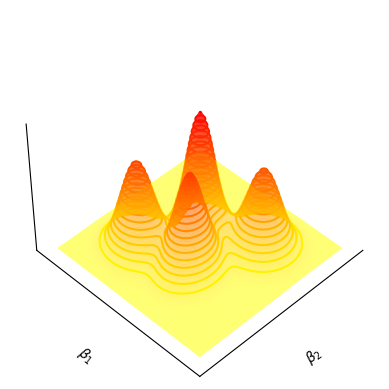

In [197]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Hide grid lines
ax.grid(False)

ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# ax.spines[['right', 'top', "left", "bottom"]].set_visible(False)

# ax.zaxis.set_label_position("none")
pos = "lower"
for axis in ax.xaxis, ax.yaxis, ax.zaxis:
    axis.set_label_position(pos)
    axis.set_ticks_position(pos)


X, Y = np.meshgrid(x, y)
x_vec = np.concatenate((np.ravel(X), np.ravel(Y))).reshape((2, -1)).T

zs = p1 * rv1.pdf(x_vec) + p2 * rv2.pdf(x_vec) + p3 * rv3.pdf(x_vec) + p4 * rv4.pdf(x_vec)
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z,
                cmap="autumn_r",
               lw=0.1, rstride=1, cstride=1,
               alpha=0.7)
ax.contour(X, Y, Z, 20, cmap="autumn_r", linestyles="solid")

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.view_init(45, -45)

ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$\beta_2$")
ax.set_zlabel("")

# plt.savefig("../Figures/posterior/multimodal.png", dpi=300)

plt.show()

## Flat

In [187]:
x = np.arange(-10.0, 10.0, 0.05)
y = np.arange(-10.0, 10.0, 0.05)

rv1 = multivariate_normal(mean=[0, 0], cov=[[4, 0], [0, 4]])
rv2 = multivariate_normal(mean=[0, 0], cov=[[10, 0], [0, 10]])

X, Y = np.meshgrid(x, y)
x_vec = np.concatenate((np.ravel(X), np.ravel(Y))).reshape((2, -1)).T

zs = rv1.pdf(x_vec)
zs[zs > np.median(zs) / 2] = np.median(zs) / 2
Z = zs.reshape(X.shape)

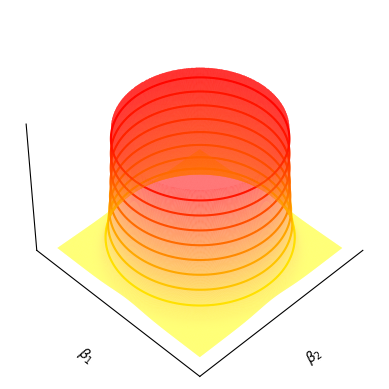

In [191]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Hide grid lines
ax.grid(False)

ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# ax.spines[['right', 'top', "left", "bottom"]].set_visible(False)

# ax.zaxis.set_label_position("none")
pos = "lower"
for axis in ax.xaxis, ax.yaxis, ax.zaxis:
    axis.set_label_position(pos)
    axis.set_ticks_position(pos)


ax.plot_surface(X, Y, Z,
                cmap="autumn_r",
               lw=0.1, rstride=1, cstride=1,
               alpha=0.7)
ax.contour(X, Y, Z, 10, cmap="autumn_r", linestyles="solid")

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.view_init(45, -45)

ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$\beta_2$")
ax.set_zlabel("")

# plt.savefig("../Figures/posterior/flat.png", dpi=300)

plt.show()

## Mayavi

In [4]:
from mayavi import mlab

### Unimodal

In [ ]:
x = np.arange(-6.0, 6.0, 0.05)
y = np.arange(-6.0, 6.0, 0.05)
rv = multivariate_normal(mean=[0, 0], cov=[[2, 0], [0, 2]])
X, Y = np.meshgrid(x, y)
x_vec = np.concatenate((np.ravel(X), np.ravel(Y))).reshape((2, -1)).T
zs = rv.pdf(x_vec)
Z = 100 * zs.reshape(X.shape)

In [27]:
plot_plane = False


mlab.figure(size=(1024, 1024), fgcolor=(0, 0, 0), bgcolor=(1, 1, 1))

mlab.view(60, 74, 17, [-2.5, -4.6, -0.3])

mlab.mesh(X, Y, Z, colormap='summer', )

if plot_plane:
    z_plane = np.zeros(shape=Z.shape) + 5
    mlab.mesh(X, Y, z_plane, colormap='Blues', )


# Nice view from the front
# mlab.view(.0, - 5.0, 4)

if plot_plane:
    mlab.savefig("../Figures/posterior/unimodal_plane.png")
else:
    mlab.savefig("../Figures/posterior/unimodal.png")

mlab.show()

### Multimodal

In [62]:
x = np.arange(-7.0, 7.0, 0.05)
y = np.arange(-7.0, 7.0, 0.05)

rv1 = multivariate_normal(mean=[-1, 1], cov=[[1, 0], [0, 1]])
rv2 = multivariate_normal(mean=[-3, -3], cov=[[1, 0], [0, 1]])
rv3 = multivariate_normal(mean=[1, -2], cov=[[1, 0], [0, 1]])
rv4 = multivariate_normal(mean=[3, 3], cov=[[1, 0], [0, 1]])

p1 = 0.23
p2 = 0.3
p3 = 0.24
p4 = 1 - p1 - p2 - p3

X, Y = np.meshgrid(x, y)
x_vec = np.concatenate((np.ravel(X), np.ravel(Y))).reshape((2, -1)).T

zs = p1 * rv1.pdf(x_vec) + p2 * rv2.pdf(x_vec) + p3 * rv3.pdf(x_vec) + p4 * rv4.pdf(x_vec)
Z = 150 * zs.reshape(X.shape)

In [65]:
plot_plane = False


# x = np.arange(-6.0, 6.0, 0.05)
# y = np.arange(-6.0, 6.0, 0.05)
# rv = multivariate_normal(mean=[0, 0], cov=[[2, 0], [0, 2]])
# X, Y = np.meshgrid(x, y)
# x_vec = np.concatenate((np.ravel(X), np.ravel(Y))).reshape((2, -1)).T
# zs = rv.pdf(x_vec)
# Z = 100 * zs.reshape(X.shape)



mlab.figure(size=(1024, 1024), fgcolor=(0, 0, 0), bgcolor=(1, 1, 1))

mlab.view(60, 74, 17, [-2.5, -4.6, -0.3])

mlab.mesh(X, Y, Z, colormap='summer', )

if plot_plane:
    z_plane = np.zeros(shape=Z.shape) + 5
    mlab.mesh(X, Y, z_plane, colormap='Blues', )


# Nice view from the front
# mlab.view(.0, - 5.0, 4)

if plot_plane:
    mlab.savefig("../Figures/posterior/multimodal_plane.png")
else:
    mlab.savefig("../Figures/posterior/multimodal.png")

mlab.show()

## Flat

In [240]:
x = np.arange(-10.0, 10.0, 0.05)
y = np.arange(-10.0, 10.0, 0.05)

rv1 = multivariate_normal(mean=[0, 0], cov=[[8, 0], [0, 8]])
# rv2 = multivariate_normal(mean=[0, 0], cov=[[10, 0], [0, 10]])

X, Y = np.meshgrid(x, y)
x_vec = np.concatenate((np.ravel(X), np.ravel(Y))).reshape((2, -1)).T

radius = 4
flat_idx = []
for idx, xy in enumerate(x_vec):
    xi = xy[0]
    yi = xy[1]
    if xi**2 + yi**2 <= radius**2:
        flat_idx.append(idx)


zs = 500 * rv1.pdf(x_vec)
zs[flat_idx] = zs[flat_idx[0]]
Z = zs.reshape(X.shape)

In [243]:
plot_plane = True


mlab.figure(size=(1024, 1024), fgcolor=(0, 0, 0), bgcolor=(1, 1, 1))

mlab.view(60, 74, 17, [-2.5, -4.6, -0.3])

mlab.mesh(X, Y, Z, colormap='summer', )

if plot_plane:
    z_plane = np.zeros(shape=Z.shape) + 3
    mlab.mesh(X, Y, z_plane, colormap='Blues', )


# Nice view from the front
# mlab.view(.0, - 5.0, 4)

if plot_plane:
    mlab.savefig("../Figures/posterior/flat_plane.png")
else:
    mlab.savefig("../Figures/posterior/flat.png")

mlab.show()